First frame loaded successfully.


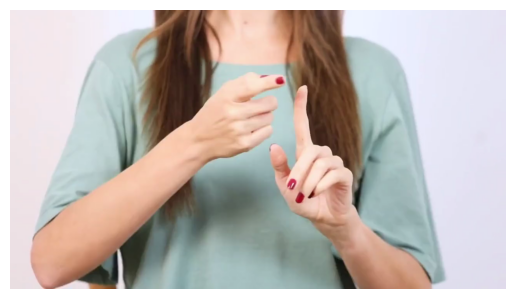

In [3]:
import cv2

video_path = "hand/test.mp4"

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

ret, frame = cap.read()
cap.release()

if not ret:
    print("Error: Could not read the first frame.")
    exit()

print("First frame loaded successfully.")

import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [4]:
import mediapipe as mp

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5
)

print("MediaPipe Hand Detector initialized.")

MediaPipe Hand Detector initialized.


I0000 00:00:1739660709.111831 3977708 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1739660709.121484 3978780 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739660709.127614 3978780 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [5]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

results = hands.process(frame_rgb)

if results.multi_hand_landmarks:
    print(f"Detected {len(results.multi_hand_landmarks)} hand(s).")
else:
    print("No hands detected.")

Detected 2 hand(s).


W0000 00:00:1739660716.651217 3978778 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [6]:
hand_keypoints = []

if results.multi_hand_landmarks:
    height, width, _ = frame.shape

    for hand_idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
        keypoints = []

        for landmark in hand_landmarks.landmark:
            x = int(landmark.x * width)
            y = int(landmark.y * height)
            keypoints.append((x, y))

        hand_keypoints.append({
            "hand_id": hand_idx,
            "keypoints": keypoints
        })

print(hand_keypoints)

[{'hand_id': 0, 'keypoints': [(487, 335), (500, 267), (551, 207), (609, 183), (650, 196), (550, 226), (619, 200), (662, 187), (695, 183), (566, 271), (670, 242), (662, 238), (637, 243), (584, 313), (670, 279), (654, 272), (628, 277), (599, 351), (667, 312), (653, 303), (630, 309)]}, {'hand_id': 1, 'keypoints': [(806, 534), (751, 510), (711, 455), (696, 408), (688, 366), (759, 369), (748, 297), (748, 250), (750, 211), (804, 371), (772, 367), (745, 419), (731, 459), (840, 392), (799, 402), (770, 447), (755, 479), (866, 423), (830, 428), (801, 455), (785, 475)]}]


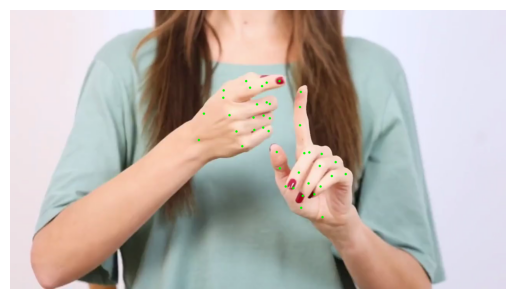

In [7]:
import numpy as np

annotated_frame = frame.copy()

for hand in hand_keypoints:
    for x, y in hand["keypoints"]:
        cv2.circle(annotated_frame, (x, y), 3, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [8]:
import json

output_file = "hand_keypoints.json"

with open(output_file, "w") as f:
    json.dump(hand_keypoints, f)

print(f"Key points saved to {output_file}.")

Key points saved to hand_keypoints.json.
